In [2]:
# import the modules
import numpy as np
from skimage import io

# define a function to compute the GLCM
def glcm(image, d, theta, levels):
    # get the image shape and initialize the GLCM matrix
    rows, cols = image.shape
    glcm = np.zeros((levels, levels))
    # loop over the image pixels and count the co-occurrences
    for i in range(rows):
        for j in range(cols):
            # get the reference pixel value
            ref = image[i, j]
            # get the neighbor pixel value based on the offset (d, theta)
            if theta == 0: # horizontal offset
                if j + d < cols:
                    neigh = image[i, j + d]
                else:
                    continue
            elif theta == 90: # vertical offset
                if i + d < rows:
                    neigh = image[i + d, j]
                else:
                    continue
            elif theta == 45: # diagonal offset
                if i + d < rows and j + d < cols:
                    neigh = image[i + d, j + d]
                else:
                    continue
            elif theta == 135: # anti-diagonal offset
                if i + d < rows and j - d >= 0:
                    neigh = image[i + d, j - d]
                else:
                    continue
            else:
                raise ValueError("Invalid angle")
            # increment the GLCM entry by 1
            glcm[ref, neigh] += 1
    # return the GLCM matrix
    return glcm

# define a function to compute the GLCM properties
def glcm_props(glcm):
    # get the GLCM shape and initialize the properties dictionary
    levels, _ = glcm.shape
    props = {}
    # normalize the GLCM by dividing by the sum of all entries
    glcm = glcm / glcm.sum()
    # compute the marginal probabilities of reference and neighbor pixels
    px = glcm.sum(axis=1)
    py = glcm.sum(axis=0)
    # compute the means and standard deviations of reference and neighbor pixels
    ux = np.sum(np.arange(levels) * px)
    uy = np.sum(np.arange(levels) * py)
    sx = np.sqrt(np.sum((np.arange(levels) - ux) ** 2 * px))
    sy = np.sqrt(np.sum((np.arange(levels) - uy) ** 2 * py))
    # loop over the GLCM entries and compute the properties
    dissimilarity = 0
    correlation = 0
    homogeneity = 0
    contrast = 0
    asm = 0
    entropy = 0
    for i in range(levels):
        for j in range(levels):
            dissimilarity += abs(i - j) * glcm[i, j]
            correlation += (i - ux) * (j - uy) * glcm[i, j] / (sx * sy)
            homogeneity += glcm[i, j] / (1 + abs(i - j))
            contrast += (i - j) ** 2 * glcm[i, j]
            asm += glcm[i, j] ** 2
            entropy -= glcm[i, j] * np.log2(glcm[i, j] + 1e-10)
    # store the properties in the dictionary
    props['dissimilarity'] = dissimilarity
    props['correlation'] = correlation
    props['homogeneity'] = homogeneity
    props['contrast'] = contrast
    props['ASM'] = asm
    props['entropy'] = entropy
    # return the properties dictionary
    return props

# read the image and convert it to grayscale
image = io.imread('/content/Q2.jpg')
gray = image[:, :, 0]

# compute the GLCM with a horizontal offset of 1 pixel and 256 levels of gray intensity
glcm = glcm(gray, 1, 0, 256)

# get the GLCM properties
props = glcm_props(glcm)

# print the results
for key, value in props.items():
    print(key + ': ', value)


dissimilarity:  9.555463423622486
correlation:  0.9611888275907161
homogeneity:  0.25779143173094266
contrast:  279.5774718997552
ASM:  0.0008285735229972046
entropy:  12.492750609663517


Text(0.5, 1.0, '$GLCM$')

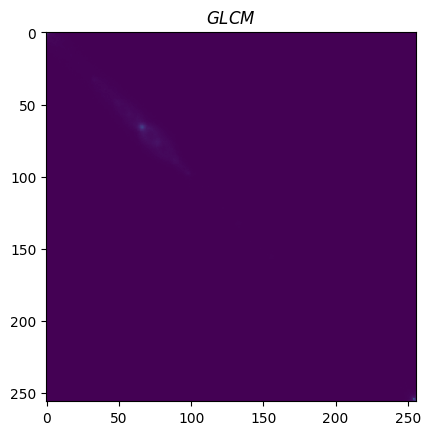

In [4]:
import matplotlib.pyplot as plt

plt.imshow(glcm)
plt.title('$GLCM$')

<ipython-input-3-e5b26dda40a1>:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(glcm))


Text(0.5, 1.0, '$\\log(GLCM)$')

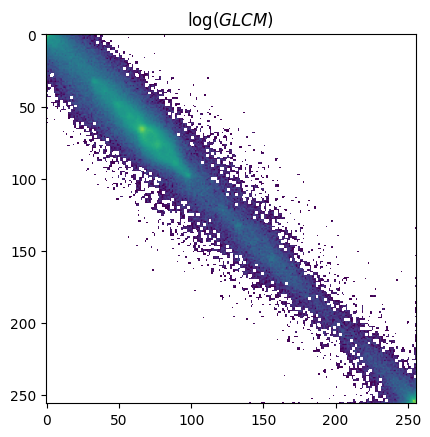

In [3]:
import matplotlib.pyplot as plt

plt.imshow(np.log(glcm))
plt.title('$\log(GLCM)$')